In [3]:
import numpy as np
import os
import PIL
import PIL.Image
import pandas as pd
from PIL import Image
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE
import seaborn as sns
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.utils import to_categorical
import cv2

from datetime import datetime as dt
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [4]:
folders=os.listdir( '245_data')
print(folders)

['!', '(', ')', '+', ',', '-', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '=', 'A', 'alpha', 'ascii_124', 'b', 'beta', 'C', 'cos', 'd', 'Delta', 'div', 'e', 'exists', 'f', 'forall', 'forward_slash', 'G', 'gamma', 'geq', 'gt', 'H', 'i', 'in', 'infty', 'int', 'j', 'k', 'l', 'lambda', 'ldots', 'leq', 'lim', 'log', 'lt', 'M', 'mu', 'N', 'neq', 'o', 'p', 'phi', 'pi', 'pm', 'prime', 'q', 'R', 'rightarrow', 'S', 'sigma', 'sin', 'sqrt', 'sum', 'T', 'tan', 'theta', 'times', 'u', 'v', 'w', 'X', 'y', 'z', '[', ']', '{', '}']


In [6]:
data = []
label = []

for each in folders:
    currentFolder = 'C:/Users/Yunao/Downloads/245_data/' + each
    for i, file in enumerate(os.listdir(currentFolder)):
        im= cv2.imread((os.path.join(currentFolder, file)))
        img=cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
        #resize
        resized_image = cv2.resize(img, (8,8))
        img = img = np.array(resized_image)
        
        img = img.ravel()
        img = img.tolist()
        
        data.append(img)
        label.append(each)
df = pd.DataFrame(data)
df["label"] = label

df.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,label
0,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,254,255,255,255,255,!
1,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,207,255,255,255,255,!
2,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,254,255,255,255,255,!
3,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,207,255,255,255,255,!
4,255,255,255,255,207,253,255,255,255,255,...,255,255,255,255,222,255,255,255,255,!


In [16]:
df.shape

(375974, 65)

In [5]:
data = []
label = []

numeric_data=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
alpha_data=['A', 'b','C','d', 'e', 'f', 'G', 'H', 'i', 'j', 'k', 'l', 'M', 'mu', 'N','o', 'p','q', 'R','S','T', 'u', 'v', 'w', 'X', 'y', 'z']
symbol_data=['!', '(', ')', '+', ',', '-','=','alpha', 'ascii_124', 'beta', 'cos', 'Delta', 'div','exists', 'forall', 'forward_slash','gamma', 'geq', 'gt', 'in', 'infty', 'int','lambda', 'ldots', 'leq', 'lim', 'log', 'lt','mu', 'neq', 'phi', 'pi', 'pm', 'prime', 'rightarrow', 'sigma', 'sin', 'sqrt', 'sum', 'tan', 'theta', 'times', '[', ']', '{', '}']


for each in folders:
    file_ct=0
    currentFolder = 'C:/Users/Yunao/Downloads/245_data/' + each
    for i, file in enumerate(os.listdir(currentFolder)):
        if(file_ct<=5000):
            im= cv2.imread((os.path.join(currentFolder, file)))
            img=cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
            #resize
            resized_image = cv2.resize(img, (8,8))
            img = img = np.array(resized_image)
        
            img = img.ravel()
            img = img.tolist()
        
            data.append(img)
            label.append(each)
            
        file_ct+=1
        
df = pd.DataFrame(data)
df["label"] = label

df.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,label
0,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,254,255,255,255,255,!
1,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,207,255,255,255,255,!
2,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,254,255,255,255,255,!
3,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,207,255,255,255,255,!
4,255,255,255,255,207,253,255,255,255,255,...,255,255,255,255,222,255,255,255,255,!


In [6]:
df.shape

(198717, 65)

EDA

<ipython-input-11-d9dbfdc1d99d>:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


ValueError: num must be 1 <= num <= 64, not 65

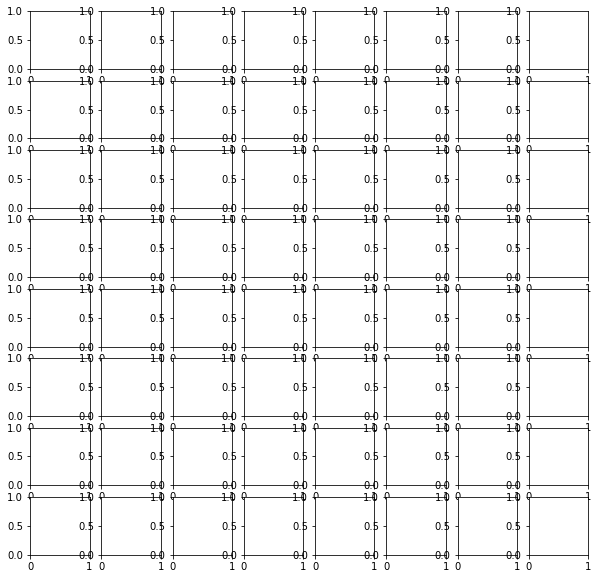

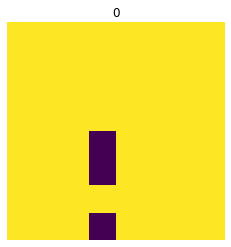

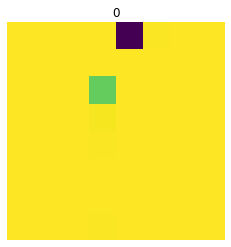

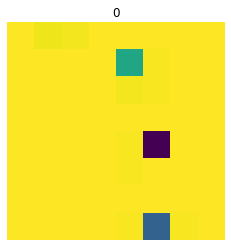

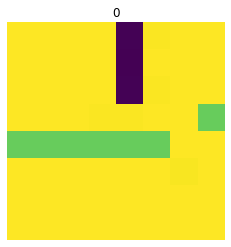

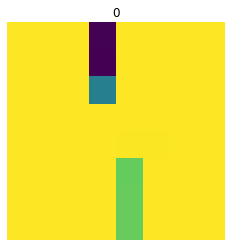

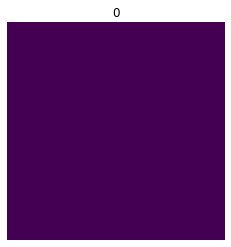

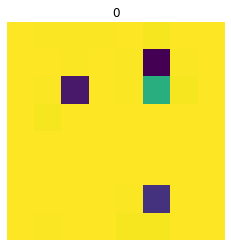

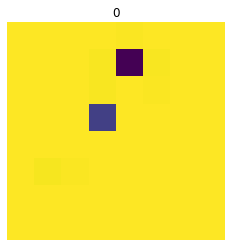

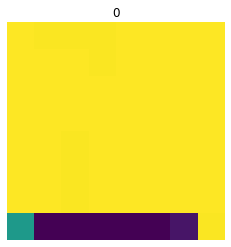

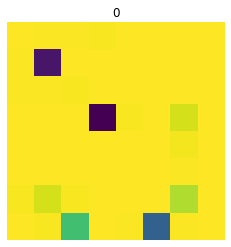

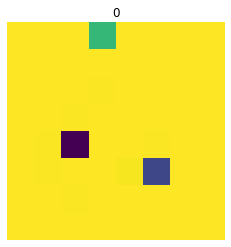

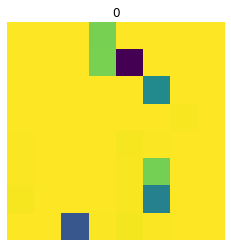

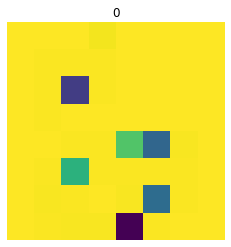

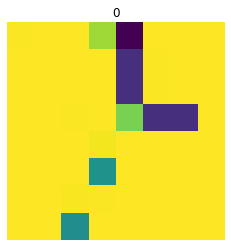

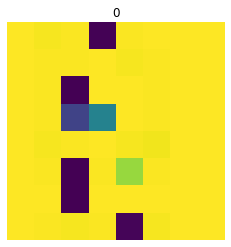

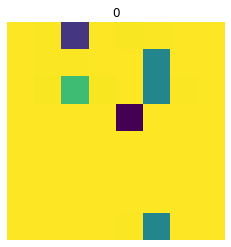

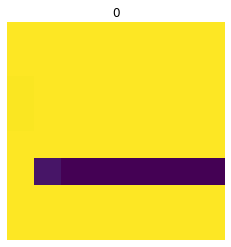

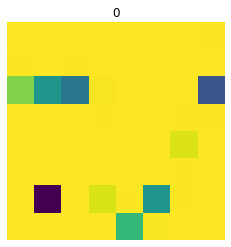

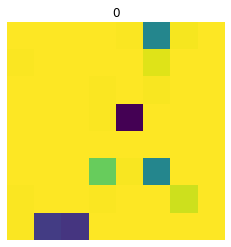

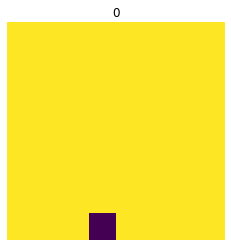

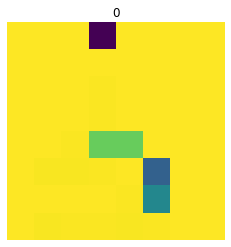

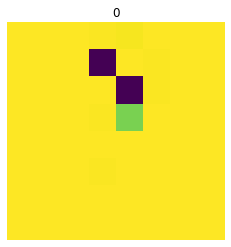

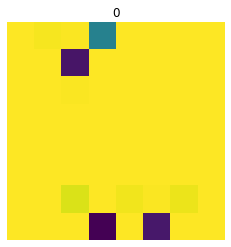

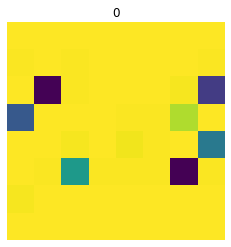

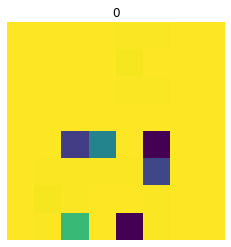

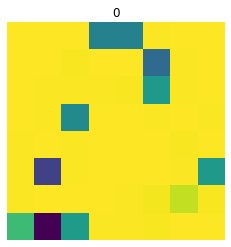

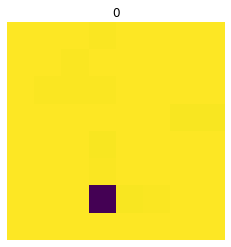

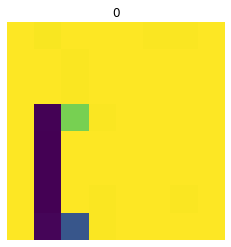

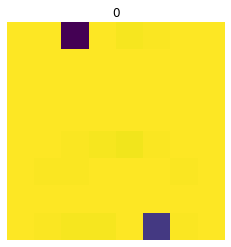

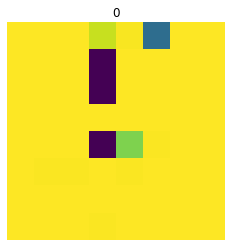

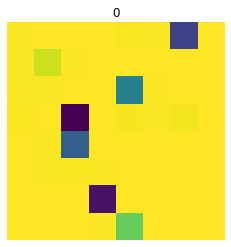

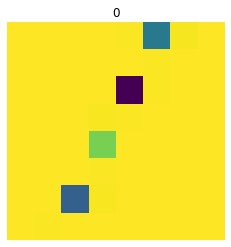

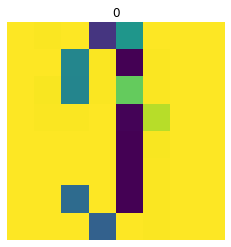

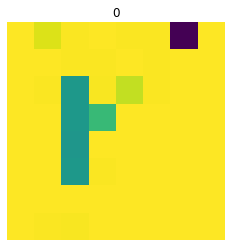

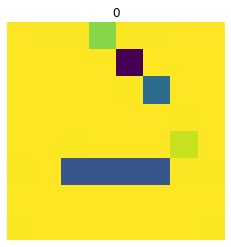

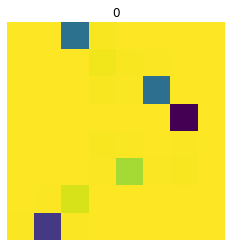

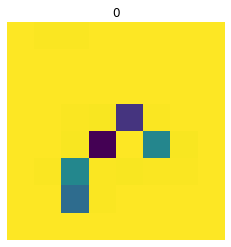

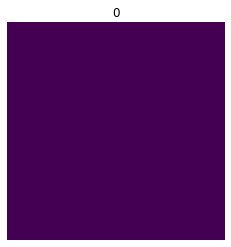

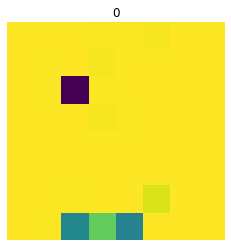

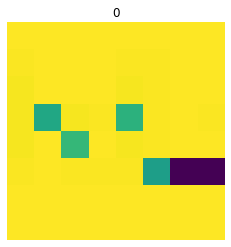

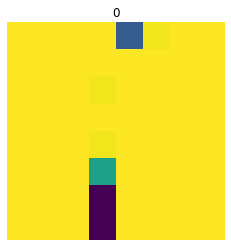

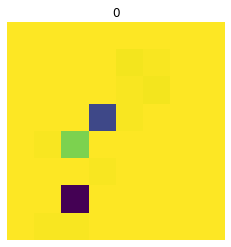

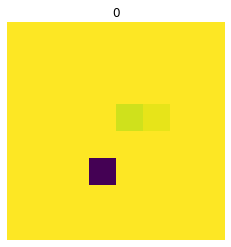

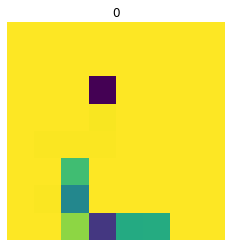

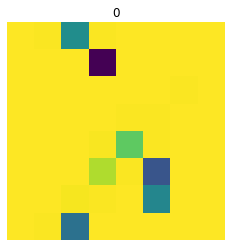

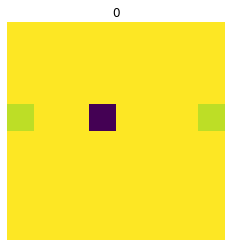

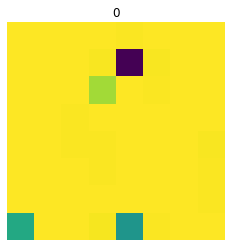

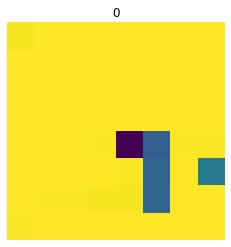

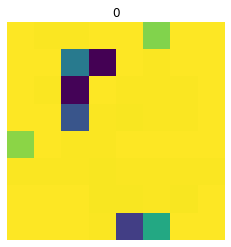

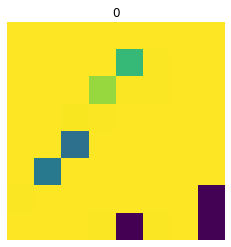

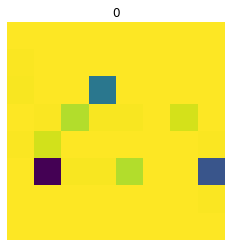

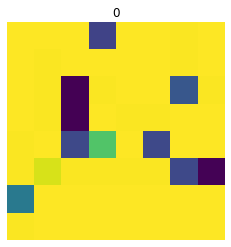

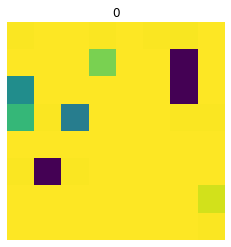

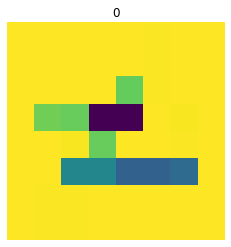

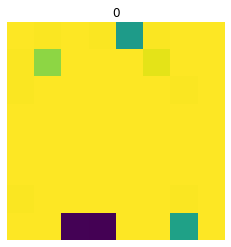

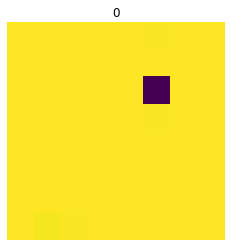

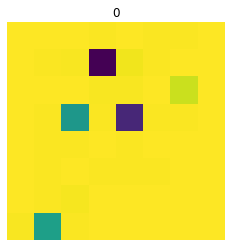

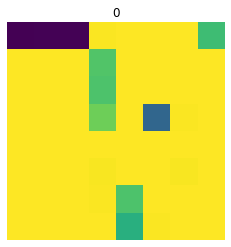

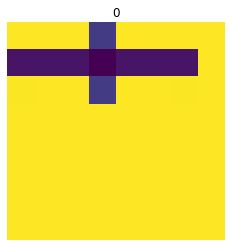

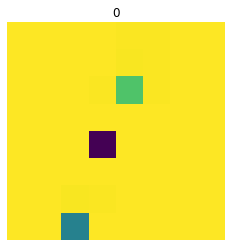

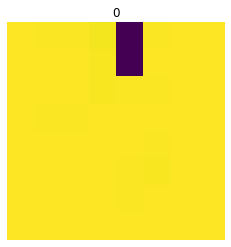

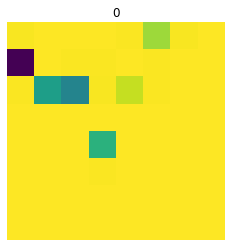

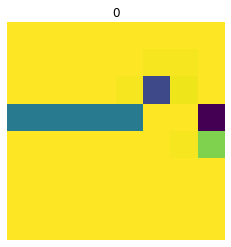

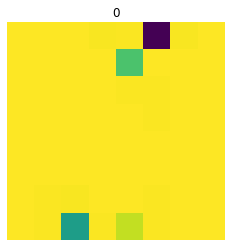

<Figure size 432x288 with 0 Axes>

In [11]:
figure = plt.figure(figsize=(10, 10))
j = 0
for i in list(set(y)):
    idx = y.index(i)
    img = x[idx]
    img = cv2.resize(img, (8, 8))
    figure.add_subplot(5, 5, j+1)
    plt.imshow(img)
    plt.axis('off')
    plt.title(i)
    j += 1

Text(0, 0.5, 'Count')

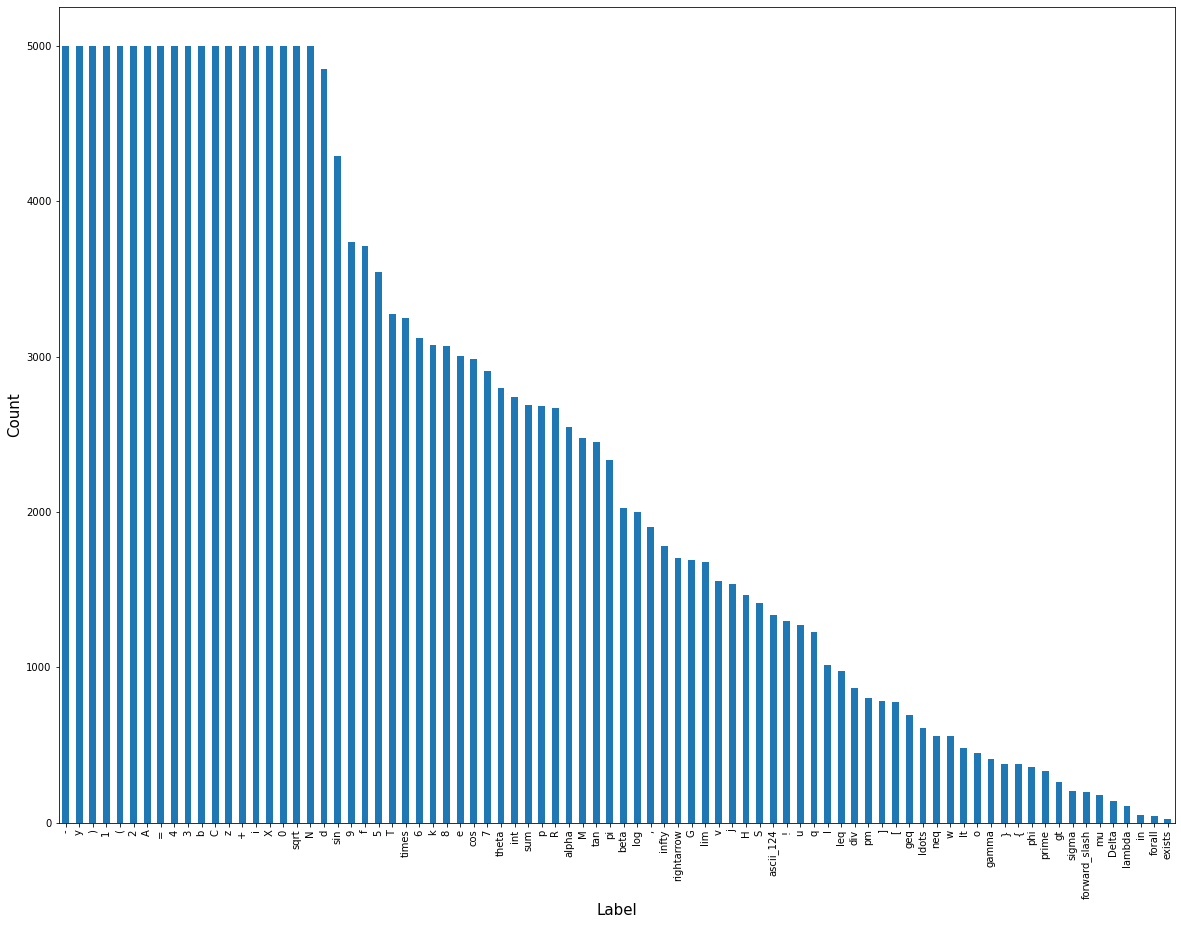

In [7]:
plt.figure(figsize=(20,15))
pd.value_counts(df['label']).plot.bar()
plt.xlabel('Label', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

In [33]:
#original image instance
import cv2
from keras.preprocessing.image import img_to_array
i=0
original_image=[]
path = r'C:/Users/Yunao/Downloads/245_data/1/1_2.jpg'
im= cv2.imread(path)
img=cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
original_image.append(img_to_array(img))


#processed image instance
processed_image=[]
im= cv2.imread(path)
img=cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
resized_image = cv2.resize(img, (8,8))   
resized_image = resized_image.astype('float32') / 255
processed_image.append(img_to_array(resized_image))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


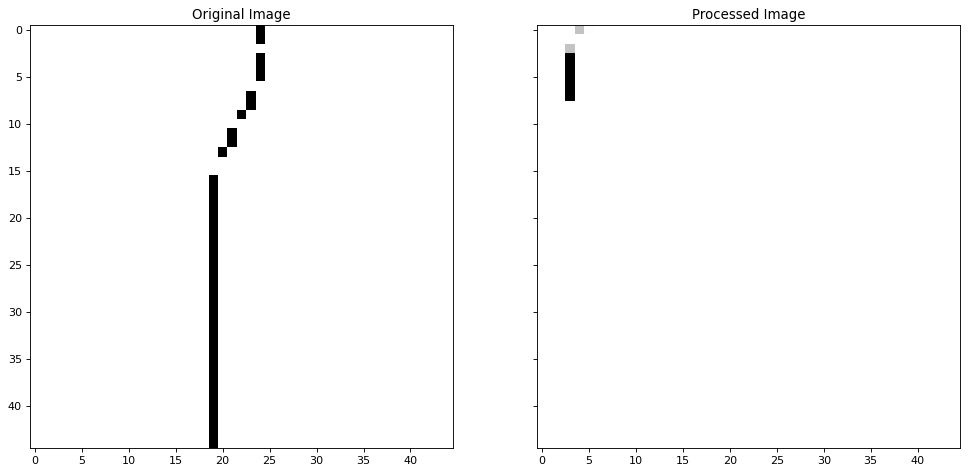

In [52]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 7), dpi=80, sharex=True, sharey=True)


ax[1].imshow(np.squeeze(processed_image),cmap='gray')
ax[0].imshow(np.squeeze(original_image))

ax[0].title.set_text('Original Image')
ax[1].title.set_text('Processed Image')

In [67]:
data=df.iloc[:,:-1]
label=df.iloc[:,-1]

from sklearn.preprocessing import LabelEncoder
label_encoded = LabelEncoder().fit_transform(label)

#60% train, 20% test, 20% validation
X_train, X_test, y_train, y_test = train_test_split(data, label_encoded, test_size=0.2, random_state=22, shuffle=True)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=22)

In [ ]:
label

In [68]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
97498,255,255,255,174,254,254,255,255,255,255,...,255,255,255,255,255,252,221,255,255,255
161144,255,254,112,255,255,253,255,255,255,255,...,252,255,255,255,255,255,255,255,255,255
118290,255,255,255,240,254,254,255,255,255,255,...,255,255,255,255,255,255,240,253,255,255
195485,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
155577,255,254,254,255,255,178,253,255,255,255,...,255,255,255,254,255,255,255,255,255,255


In [69]:
print('Training dataset contains: ', X_train.shape, ' data')
print('Testing dataset contains: ', X_test.shape, ' data')
print('Validation dataset contains: ', X_val.shape, ' data')

Training dataset contains:  (129915, 64)  data
Testing dataset contains:  (43306, 64)  data
Validation dataset contains:  (43305, 64)  data


Text(0.5, 1.0, 'Predicted vs. Actual Values ')

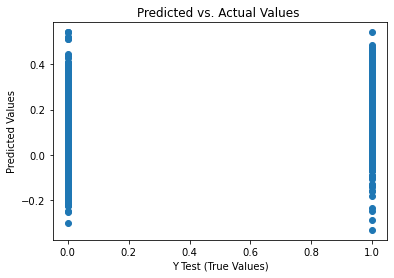

In [70]:

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
plt.scatter(y_test,y_pred)
plt.xlabel('Y Test (True Values)')
plt.ylabel('Predicted Values')
plt.title('Predicted vs. Actual Values ')


In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier



model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy_score(y_test,y_pred)

NameError: name 'X_train' is not defined

In [56]:
column_names = ["training duration", "predicting duration", "accuracy score"]
performance_result = []
def svm_model(X_train, X_test, y_train, y_test):
    from sklearn import svm
    train_start = dt.now()
    svm_classifier = svm.SVC(kernel='rbf',gamma=0.001,C=5)
    svm_classifier.fit(X_train, y_train)
    traing_time = (train_start.now() - start).seconds
    
    predict_start=dt.now()
    y_pred = svm_classifier.predict(X_test)
    predict_time = (predict_start.now() - start).seconds
    
    accuracy = accuracy_score(y_test,y_pred)*100
    
    performance_result.append(['SVM',traing_time,predict_time,accuracy])
    
    #print(confusion_matrix(y_test, y_pred))
    #print(classification_report(y_test, y_pred))

def gaussian_naive_bayes(X_train, X_test, y_train, y_test):
    from sklearn.naive_bayes import GaussianNB
    
    train_start = dt.now()
    GNB_classifier = GaussianNB()
    GNB_classifier.fit(X_train, y_train)
    traing_time = (train_start.now() - start).seconds
    
    predict_start=dt.now()
    y_pred = GNB_classifier.predict(X_test)
    predict_time = (predict_start.now() - start).seconds
    
    performance_result.append(['NB',traing_time,predict_time,accuracy])

def decision_tree(X_train, X_test, y_train, y_test):
    from sklearn import tree
    
    train_start = dt.now()
    dt_classifier = tree.DecisionTreeClassifier()
    dt_classifier.fit(X_train, y_train)
    traing_time = (train_start.now() - start).seconds
    
    predict_start=dt.now()
    y_pred = dt_classifier.predict(X_test)
    predict_time = (predict_start.now() - start).seconds
    
    performance_result.append(['DT',traing_time,predict_time,accuracy])

def random_forest(X_train, X_test, y_train, y_test):
    from sklearn.ensemble import RandomForestClassifier
    
    train_start = dt.now()
    RF_classifier = RandomForestClassifier(max_depth=2, random_state=0)
    RF_classifier.fit(X_train, y_train)
    traing_time = (train_start.now() - start).seconds
    
    predict_start=dt.now()
    y_pred = RF_classifier.predict(X_test)
    predict_time = (predict_start.now() - start).seconds
    
    performance_result.append(['RF',traing_time,predict_time,accuracy])

def k_nearest_neighbors(X_train, X_test, y_train, y_test):
    from sklearn.neighbors import KNeighborsClassifier
    
    train_start = dt.now()
    KNN_classifier = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
    KNN_classifier.fit(X_train, y_train)
    traing_time = (train_start.now() - start).seconds
    
    predict_start=dt.now()
    y_pred = KNN_classifier.predict(X_test)
    predict_time = (predict_start.now() - start).seconds
    
    performance_result.append(['KNN',traing_time,predict_time,accuracy])

def stochastic_gradient_decend(X_train, X_test, y_train, y_test):
    from sklearn.linear_model import SGDClassifier
    
    train_start = dt.now()
    sgd_classifier = SGDClassifier(loss="hinge", penalty="l2", max_iter=5)
    sgd_classifier.fit(X_train, y_train)
    traing_time = (train_start.now() - start).seconds
    
    predict_start=dt.now()
    y_pred = sgd_classifier.predict(X_test)
    predict_time = (predict_start.now() - start).seconds
    
    performance_result.append(['GD',traing_time,predict_time,accuracy])

def using_tsne(X_train,y_train):
    tsne = TSNE()
    X_embedded = tsne.fit_transform(X_train)
    sns.scatterplot(X_embedded[:, 0], X_embedded[:, 1], hue=y_train, legend='full', palette=palette)
    plt.show()

In [24]:
error = []

for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))
    
    
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

NameError: name 'KNeighborsClassifier' is not defined